# Importando as bibliotecas


#### Vamos usar o dataset - California Housing

MedInc (Mediana da renda dos domicílios): Esta variável representa a mediana da renda familiar para os distritos do conjunto de dados. É uma medida-chave da capacidade de compra dos residentes em uma determinada área.

HouseAge (Idade mediana das casas): Indica a idade mediana das casas em um determinado distrito. Isso pode ser um indicador do estado de conservação das casas e também da infraestrutura da região.

AveRooms (Número médio de quartos por domicílio): Esta variável representa o número médio de quartos em casas dentro de um distrito. Pode ser um indicador do tamanho médio das casas na área.

AveBedrms (Número médio de quartos para dormir): Indica o número médio de quartos designados para dormir nas casas. Isso pode fornecer insights sobre o layout das residências na região.

Population (População): Representa o número de pessoas que vivem em um distrito. É um fator importante a considerar ao avaliar a demanda por habitação na área.

AveOccup (Ocupação média por domicílio): Esta variável indica a ocupação média por domicílio no distrito. Pode ser útil para entender a densidade populacional e a capacidade de moradia na região.

Latitude (Latitude): A latitude geográfica do centro do distrito em graus decimais. É uma coordenada geográfica que pode estar relacionada a fatores como clima, localização e proximidade de serviços.

Longitude (Longitude): A longitude geográfica do centro do distrito em graus decimais. Assim como a latitude, a longitude pode influenciar vários aspectos, como localização em relação a cidades próximas e acesso a recursos.

Target (Variável alvo - Valor mediano das casas): Esta é a variável alvo que queremos prever. Representa o valor mediano das casas para cada distrito. É a variável que geralmente tentamos prever em problemas de regressão com este conjunto de dados.

**Importando as Bibliotecas**

Nesta primeira etapa, você importa as bibliotecas necessárias:

pandas: Para manipulação de dados em DataFrames.
**train_test_split** (do sklearn.model_selection): Para dividir o conjunto de dados em treinamento e teste.

**StandardScaler** (do sklearn.preprocessing): Normaliza os dados para melhorar o desempenho do modelo.

**MLPRegressor** e **DecisionTreeRegressor** (do sklearn.neural_network e sklearn.tree): Modelos de regressão para previsão.
mean_squared_error (do sklearn.metrics): Métrica de erro quadrático médio para avaliar o modelo.

**fetch_california_housing** (do sklearn.datasets): Carrega o conjunto de dados California Housing.

**matplotlib.pyplot**: Para visualizar o desempenho do modelo com gráficos.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Importa Dataset

In [ ]:
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


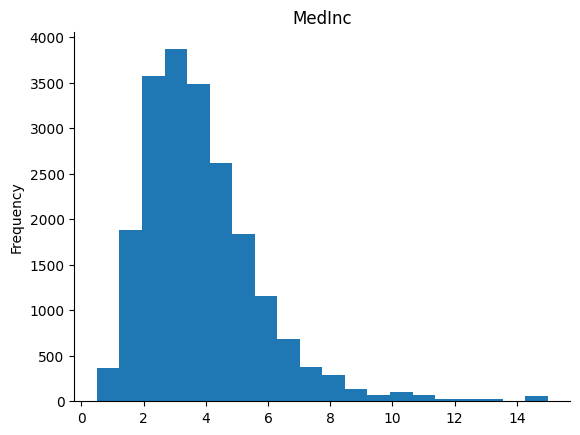

In [ ]:
# @title MedInc

from matplotlib import pyplot as plt
data['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data['target']

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# Dividindo em conjunto de treino e teste

**Dividindo em Conjunto de Treino e Teste**

Dividimos o conjunto de dados para treinamento e teste:

**train_test_split**(data, test_size=0.2, random_state=0): Divide os dados em 80% para treino e 20% para teste, garantindo consistência nos resultados com random_state=0.

In [ ]:
x = data.iloc[:, 0:8]
y = data.iloc[:, 8]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Normalização dos Dados**

A normalização ajusta a escala das variáveis de entrada, reduzindo variações nos dados e ajudando a melhorar o desempenho do modelo:

StandardScaler(): Calcula a média e desvio padrão dos dados de treino para ajustar as variáveis.
Transformação e Reconversão: Normaliza as colunas de variáveis de entrada (excluindo target) e reverte para DataFrame, preservando a coluna target.

In [ ]:
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(x_train)
feature_test_scaled = scaler.transform(x_test)

# Árvore de Decisão



**Árvore de Decisão**

Primeiro modelo utilizado, onde treinamos uma árvore de decisão para prever a variável target:

**DecisionTreeRegressor()**: Modelo de regressão que particiona os dados em uma estrutura de árvore para prever o valor mediano das casas.
Treinamento e Predição: O modelo é treinado e gera previsões sobre os dados de teste.

**Erro Quadrático Médio (MSE)**: Avaliamos a precisão do modelo com mean_squared_error, que mostra a média dos erros quadráticos entre os valores reais e previstos.

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(feature_train_scaled, y_train)
tree_pred = tree_model.predict(feature_test_scaled)
tree_mse = mean_squared_error(y_test, tree_pred)

In [ ]:
tree_mse

2.7309295397431685

# Redes Neurais

**Rede Neural**

Em seguida, utilizamos um modelo de rede neural para fazer previsões:

**MLPRegressor**(hidden_layer_sizes=(50,30,1), activation="identity", solver='adam', random_state=1, max_iter=500): Rede neural com 3 camadas (50, 30 e 1 neurônios, respectivamente) e ativação linear (identity). Utilizamos o adam como otimizador e limitamos a 500 iterações para evitar o sobreajuste.
Treinamento e Predição: O modelo é treinado e, em seguida, utilizado para gerar previsões sobre os dados de teste.

**Erro Quadrático Médio (MSE)**: Avaliamos a precisão do modelo com o MSE, calculando a diferença média ao quadrado entre os valores reais e os previstos.

In [ ]:
nn_model = MLPRegressor(hidden_layer_sizes=(50,30,1), activation="identity", solver='adam', random_state=1, max_iter=500)
nn_model.fit(feature_train_scaled, y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=(50, 30, 1),
             max_iter=500, random_state=1)

In [ ]:
nn_predict = nn_model.predict(feature_test_scaled)
mse_nn = mean_squared_error(y_test, nn_predict)

In [ ]:
mse_nn

1.3139755341238053

**Visualização dos Resultados**

Finalmente, comparamos as previsões da rede neural aos valores reais:

Gráfico de Desempenho: Usamos matplotlib para visualizar as previsões da rede neural (em azul) contra os valores reais (em vermelho), o que nos ajuda a avaliar visualmente o desempenho do modelo e sua precisão.

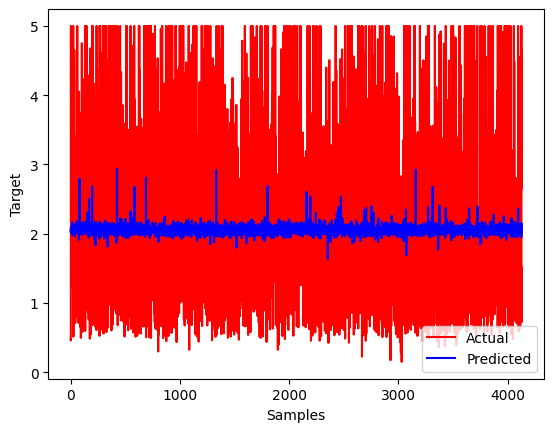

In [ ]:
# Plot
plt.plot(y_test.values, color='red', label='Actual')
plt.plot(nn_predict, color='blue', label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Target')
plt.legend()
plt.show()

# Regressão Logística x Rede Neural

**Pacotes**

Você começa importando as bibliotecas necessárias:

**pandas**: Para manipulação e análise de dados.

**train_test_split** (de sklearn.model_selection): Para dividir o dataset em conjuntos de treino e teste.

**StandardScaler** (de sklearn.preprocessing): Normaliza os dados para melhorar o desempenho do modelo.

**LogisticRegression** (de sklearn.linear_model): Para a aplicação de Regressão Logística.

**MLPClassifier** (de sklearn.neural_network): Para criar e treinar um modelo de Rede Neural.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carrega Dataset

**Carregar Dataset**

Carrega os dados de câncer de mama a partir de um arquivo CSV:

**pd.read_csv**('BreastCancer.csv', sep=";"): Lê o arquivo BreastCancer.csv com delimitador de ponto e vírgula. Esse dataset inclui informações sobre tumores, como características das células e a classificação do tumor (malignant ou benign).

In [ ]:
data = pd.read_csv('BreastCancer.csv', sep=";")

In [ ]:
data

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


<ipython-input-5-63326f82abeb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Cell.size', y='Class', inner='box', palette='Dark2')


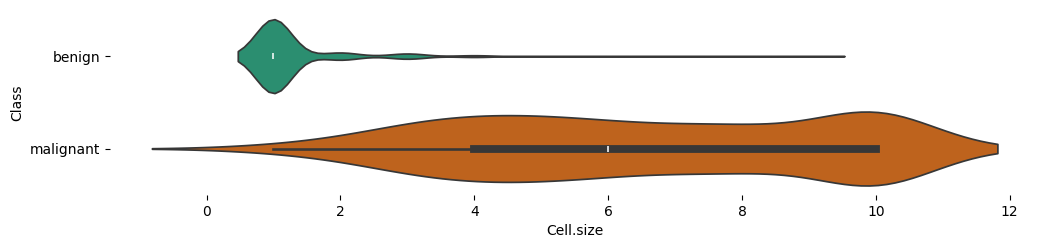

In [ ]:
# @title Class vs Cell.size

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Cell.size', y='Class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

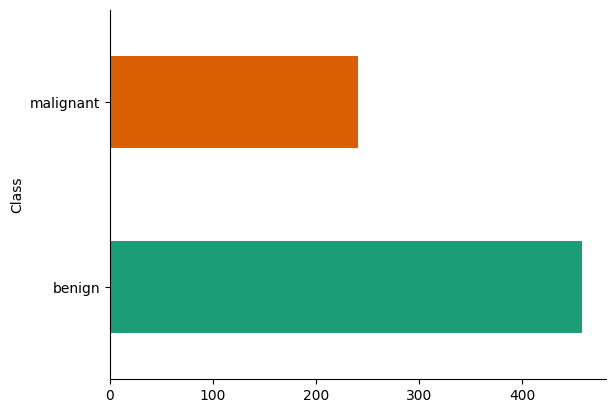

In [ ]:
# @title Class

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Pré-processamento

**Pré-processamento**

Esta etapa prepara os dados para análise e modelagem:

Remover dados ausentes: data.dropna() remove linhas com valores nulos.
Mapeamento de Classes: Converte a coluna Class para valores binários. Define a classe malignant como 1 e benign como 0, facilitando a interpretação e o treinamento dos modelos.

In [ ]:
data = data.dropna()

In [ ]:
categoria_alvo = 'malignant'
data['Class'] = data['Class'].replace({categoria_alvo: 1, 'benign': 0})

<ipython-input-14-45c15f5d10d9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Class'] = data['Class'].replace({categoria_alvo: 1, 'benign': 0})


In [ ]:
data

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


# Train Test Split

**Separação de Features e Variável Alvo (Train Test Split)**

Separação das variáveis independentes e da variável alvo Class:

Definição de X e y: X contém as features, e y contém a variável alvo Class.
Divisão do dataset: **train_test_split**(X, y, test_size=0.3, random_state=42) divide os dados em 70% para treino e 30% para teste, mantendo os resultados consistentes com random_state=42.

In [ ]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normaliza

In [ ]:
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Regressão Logística**

Treina um modelo de Regressão Logística para prever a classe do tumor:

**LogisticRegression**(): Instancia o modelo de Regressão Logística.
Treinamento: log_reg.fit(X_train_scaled, y_train) ajusta o modelo aos dados de treino.

**Predições e Avaliação**: O modelo prevê as classes no conjunto de teste com log_reg.predict(X_test_scaled)

$$[
P(Y=1 \mid \mathbf{X}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p)}}
]$$


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
## Criando e treinando o modelo

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

## Fazendo as previsões
log_reg_predictions = log_reg.predict(X_test_scaled)

## Avaliando o modelo com acurácia

log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print("Acurácia da Regressão Logística:", log_reg_accuracy)


Acurácia da Regressão Logística: 0.9560975609756097


# Rede Neural

**Rede Neural**

Treina um modelo de Rede Neural para prever a classe do tumor:

**MLPClassifier**(hidden_layer_sizes=(5, 4, 2), random_state=42, max_iter=1000): Cria uma rede neural com três camadas escondidas de tamanhos 5, 4 e 2 neurônios. random_state=42 assegura que os resultados sejam reprodutíveis, e max_iter=1000 define o número máximo de iterações de treinamento.
Treinamento: nn_classifier.fit(X_train_scaled, y_train) ajusta a rede neural aos dados de treino.

Predições e Avaliação: O modelo gera predições para o conjunto de teste com nn_classifier.predict(X_test_scaled), e a acurácia é calculada para avaliar o desempenho.

[
\begin{aligned}
\mathbf{a}^{(1)} &= f^{(1)}(\mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}) \\
\mathbf{a}^{(2)} &= f^{(2)}(\mathbf{W}^{(2)} \mathbf{a}^{(1)} + \mathbf{b}^{(2)}) \\
\mathbf{a}^{(3)} &= f^{(3)}(\mathbf{W}^{(3)} \mathbf{a}^{(2)} + \mathbf{b}^{(3)}) \\
\hat{y} &= \sigma(\mathbf{W}^{(4)} \mathbf{a}^{(3)} + \mathbf{b}^{(4)})
\end{aligned}
]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Criando e treinando o modelo de Rede Neural para classificação
nn_classifier = MLPClassifier(hidden_layer_sizes=(5, 4, 2), random_state=42, max_iter=1000)
nn_classifier.fit(X_train_scaled, y_train)

# Fazendo previsões
nn_predictions = nn_classifier.predict(X_test_scaled)

# Avaliando o modelo (usando acurácia para classificação)
nn_accuracy = accuracy_score(y_test, nn_predictions)

print(f"Acurácia: {nn_accuracy:.4f}")

Acurácia: 0.9561


**Resultados**

Imprime a acurácia para ambos os modelos:
